
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Group members:

## Evan David, ead955


## Anuraag Mohile, arm5695

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

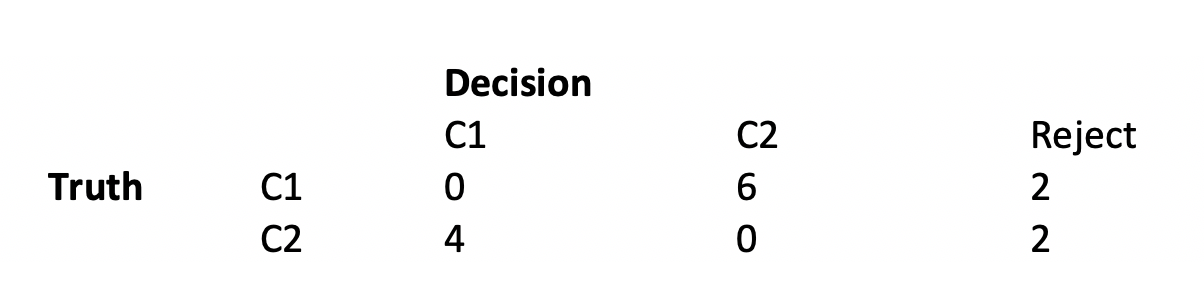

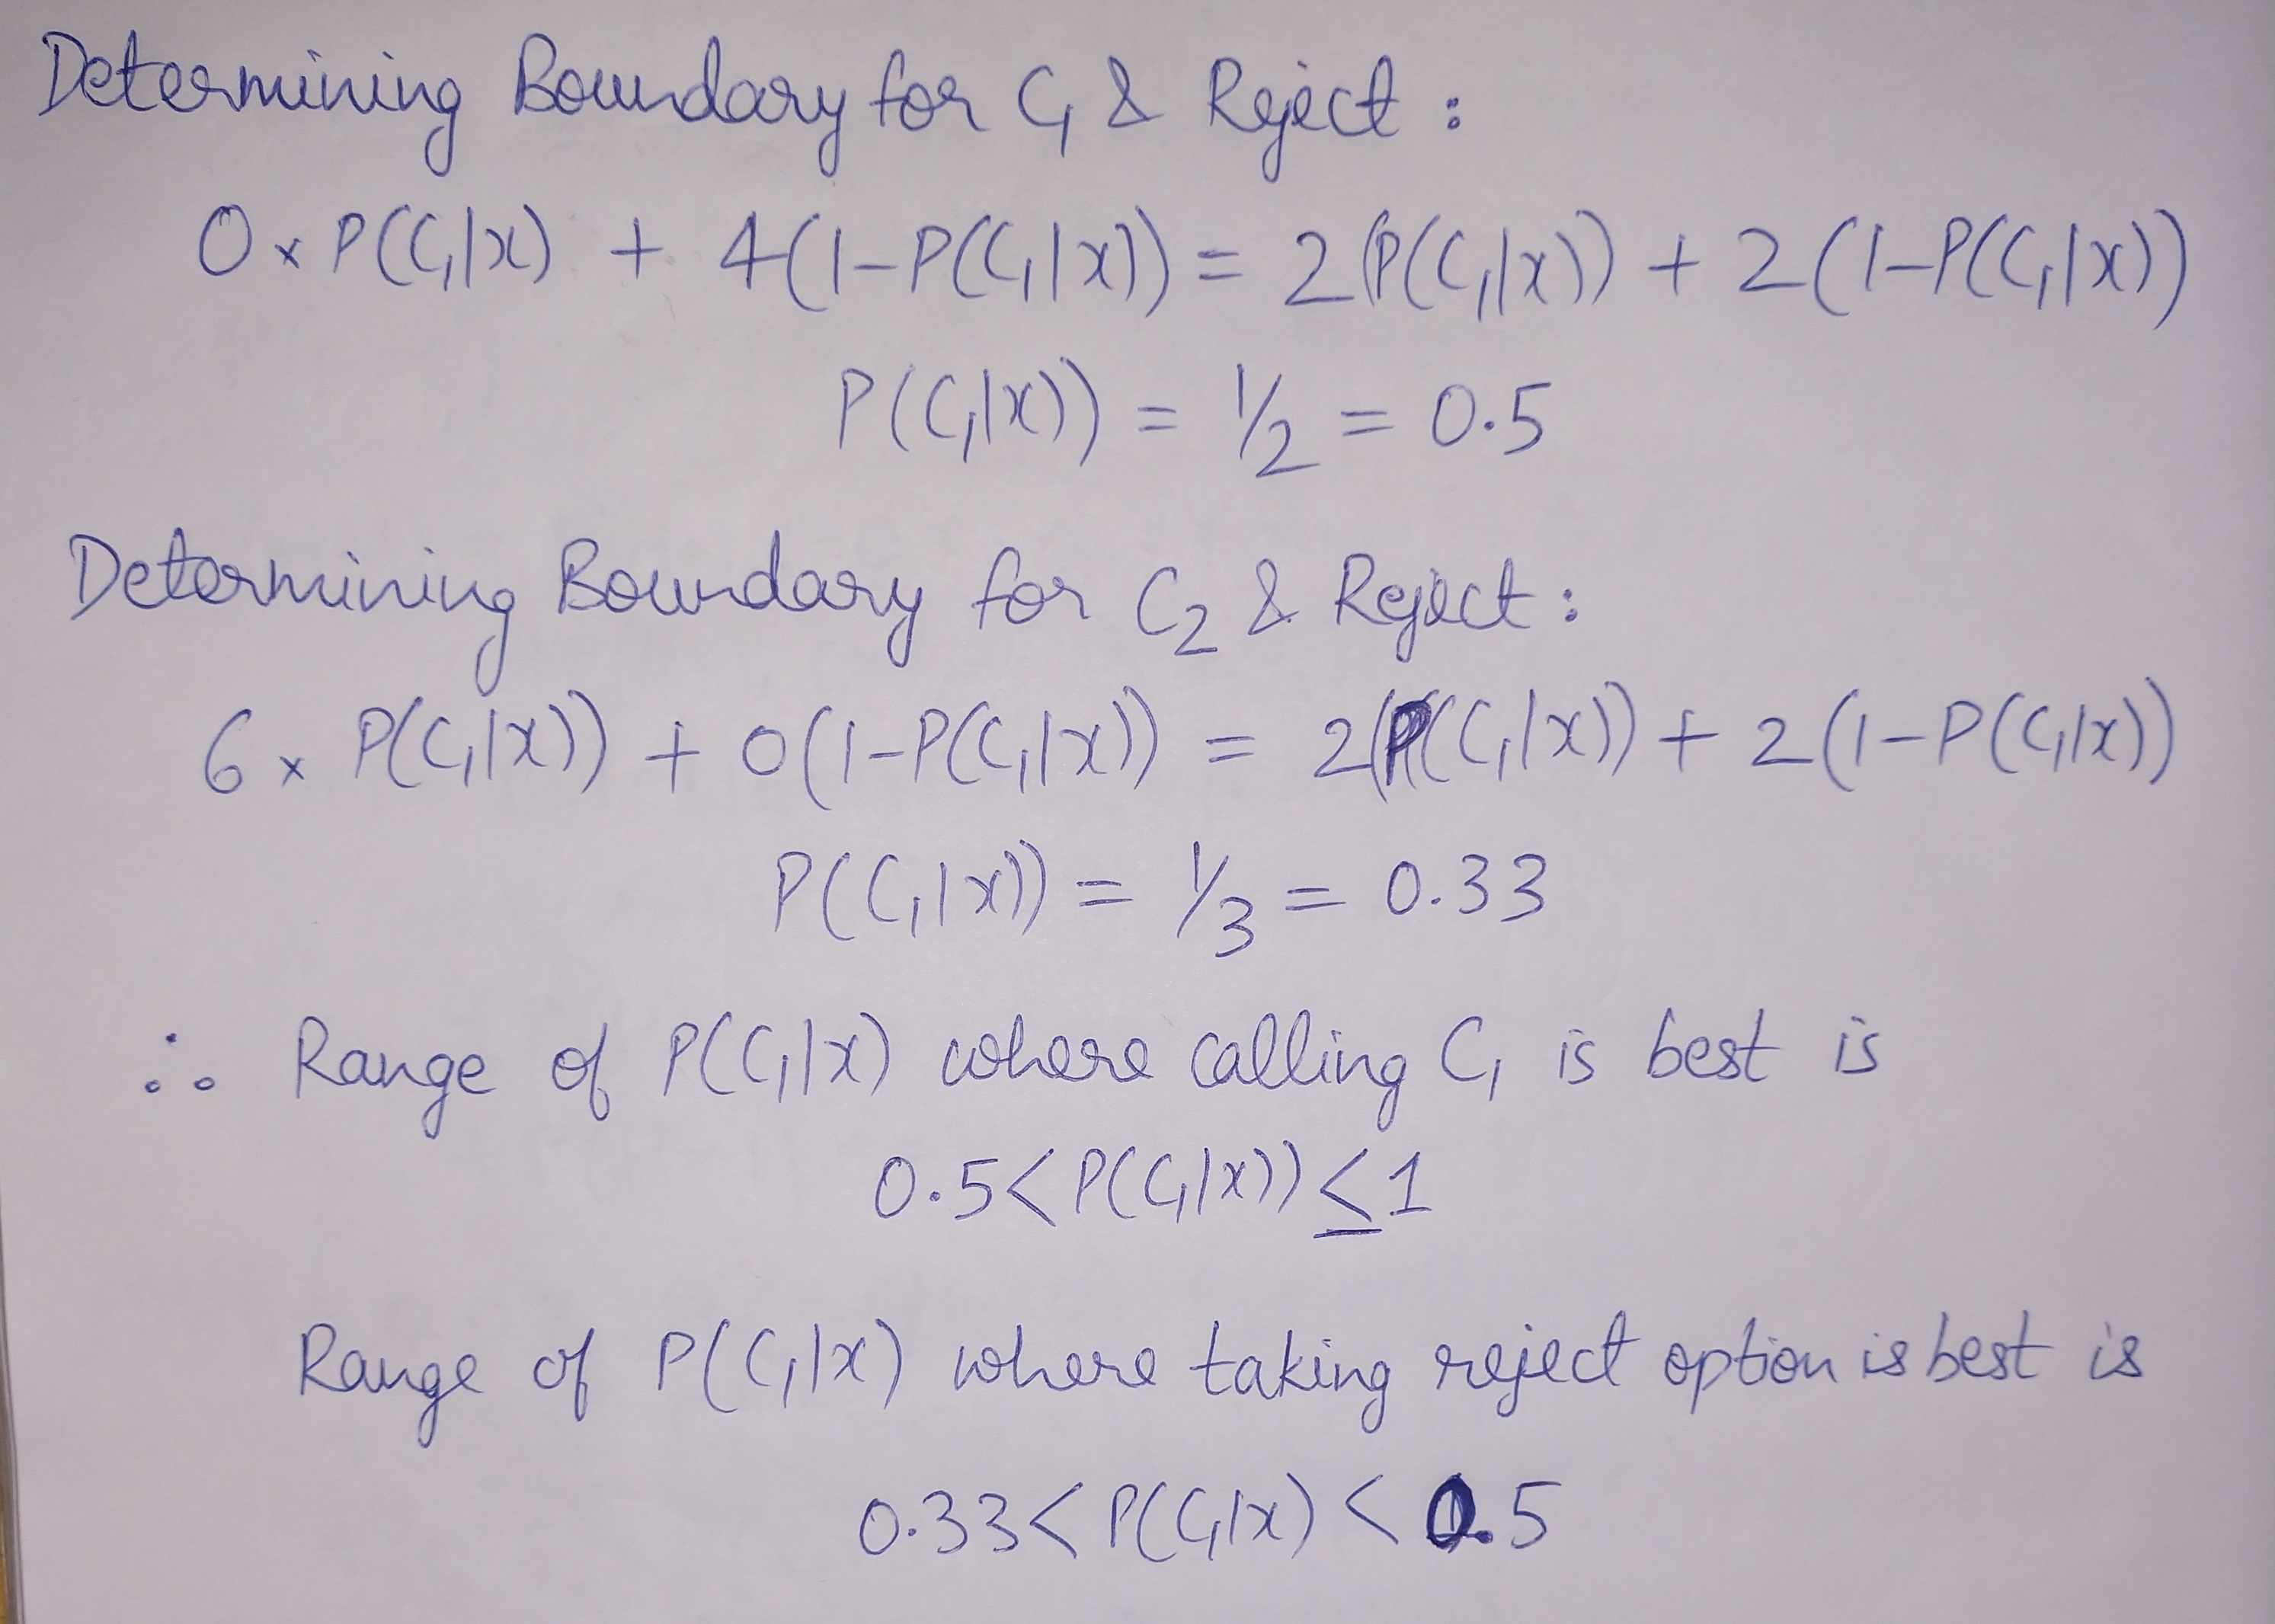

# Question 2 - Concepts (15 pts)

### 1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart? How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)

A Lift curve is a way to plot the effectiveness of a predictive classification model wherein the Lift is the ratio of the results with the model to results without the model.

It is similar to an ROC curve in the sense that it gives us information on model effectiveness and a convex curve which is better than the base case. Like in an ROC curve, the more the distance of the curve from the baseline, better the performance of a model. Also, each binary classifier for different thresholds corresponds to a point on the curve just like in an ROC curve.

It differs from an ROC curve in the fact that the data points are ordered from highest to lowest probability before plotting to showcase the richness of the initial population.

Lift will be preferred over AUROC in a case where the response rate of a category is very low eg. direct mail response rate in a marketing application. We would need to know the fewest mailings that give us most responses and thus, we would be interested in the beginning of the curve.

### 2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

The distribution of the probabilities can be adjusted to better match the expected distribution observed in the data. This adjustment is referred to as calibration. It is done by applying a correction factor to get as accurate posterior probabilities as possible.

In a decision making process, knowing the true probabilities is important and estimating the most likely class label is not enough. This is because the posterior probabilities are used in the loss calculations and having inaccurate probabilities may lead to incorrect decision making in terms of deciding thresholds. An example would be in a test for whether a person has cancer - it would be important to assign probabilities of whether someone has cancer instead of just labeling them as having cancer or not having cancer. Thus, in such cases, calibration is important.

# Question 3 - MNIST Classification (20 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Logistic Regression, Naive Bayes, and MLP. The code below loads the dataset, splits it into training and testing sets, and extracts the images containing either 8 or 9. The modules you will need from scikit-learn are loaded for you.











In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

num_train = 60000
idxs_perm = np.random.permutation(X.shape[0])
idxs_train = idxs_perm[:num_train]
idxs_test = idxs_perm[num_train:]

In [2]:
X_train = X[idxs_train]
y_train = y[idxs_train]
X_test = X[idxs_test]
y_test = y[idxs_test]

In [3]:
digits = [8, 9]
idx = (y_train == digits[0]) + (y_train==digits[1])
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-digits[0])

idx = (y_test == digits[0]) + (y_test==digits[1])
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-digits[0])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11838, 784) (11838,) (1945, 784) (1945,)


### 1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

In [4]:
# set up logistic model, get class predictions and posterior probabilities
model = LogisticRegression()
logfit = model.fit(X_train, y_train)
logpred = logfit.predict(X_test)
logprob = logfit.predict_proba(X_test)

# set up Naive Bayes model, get class predictions and posterior probabilities
model2 = GaussianNB()
NBfit = model2.fit(X_train, y_train)
NBpred = NBfit.predict(X_test)
NBprob = -NBfit.predict_proba(X_test)

# set up Multi-layer perceptron model, get class predictions and posterior probabilities
model3 = MLPClassifier()
MLPfit = model3.fit(X_train, y_train)
MLPpred = MLPfit.predict(X_test)
MLPprob = -MLPfit.predict_proba(X_test)

print ('Logistic Probabilities: \n')
print (logprob,'\n')

print ('Naive Bayes Probabilities: \n')
print (-NBprob,'\n')

print ('MLP Probabilities: \n')
print (-MLPprob,'\n')

Logistic Probabilities: 

[[9.99998873e-01 1.12665470e-06]
 [1.44120996e-04 9.99855879e-01]
 [6.42897662e-04 9.99357102e-01]
 ...
 [9.94129836e-01 5.87016443e-03]
 [9.92532253e-01 7.46774699e-03]
 [4.36411630e-01 5.63588370e-01]] 

Naive Bayes Probabilities: 

[[1.00000000e+000 0.00000000e+000]
 [5.59663938e-273 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 ...
 [1.00000000e+000 0.00000000e+000]
 [7.41788665e-042 1.00000000e+000]
 [9.92881727e-076 1.00000000e+000]] 

MLP Probabilities: 

[[9.99999949e-01 5.05601186e-08]
 [2.62386917e-07 9.99999738e-01]
 [3.87844390e-08 9.99999961e-01]
 ...
 [9.99999453e-01 5.47019179e-07]
 [9.99967780e-01 3.22201313e-05]
 [8.41896999e-01 1.58103001e-01]] 



### 2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)

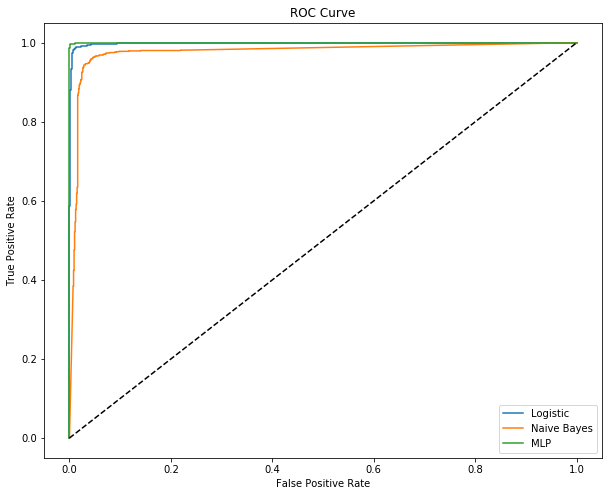

In [5]:
# get the ROC curve for the logistic model
logfpr, logtpr, logthresholds = roc_curve(y_test, logprob[:,1])

# get the ROC curve for the Naive Bayes model
NBfpr, NBtpr, nbthresholds = roc_curve(y_test, NBprob[:,0])

# get the ROC curve for the MLP model
MLPfpr, MLPtpr, mlpthresholds = roc_curve(y_test, MLPprob[:,0])

# plot these curves
plt.figure(figsize=(10,8))
plt.plot(logfpr, logtpr, label='Logistic')
plt.plot(NBfpr, NBtpr, label='Naive Bayes')
plt.plot(MLPfpr, MLPtpr, label='MLP')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

### 3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.

In [6]:
print ('AUC (Logistic): ', roc_auc_score(y_test, logprob[:,1]))
print ('AUC (Naive Bayes): ', roc_auc_score(y_test, NBprob[:,0]))
print ('AUC (MLP): ', roc_auc_score(y_test, MLPprob[:,0]))

AUC (Logistic):  0.9983788071065989
AUC (Naive Bayes):  0.9765297165820642
AUC (MLP):  0.9998889593908629


In [7]:
# get accuracy from the score method
print ('Accuracy (Logistic): ', logfit.score(X_test, y_test))
print ('Accuracy (Naive Bayes): ', NBfit.score(X_test, y_test))
print ('Accuracy (MLP): ', MLPfit.score(X_test, y_test))

Accuracy (Logistic):  0.9866323907455012
Accuracy (Naive Bayes):  0.897172236503856
Accuracy (MLP):  0.9953727506426735


### 4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 

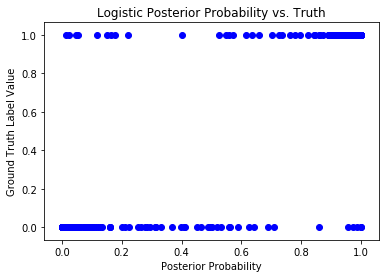

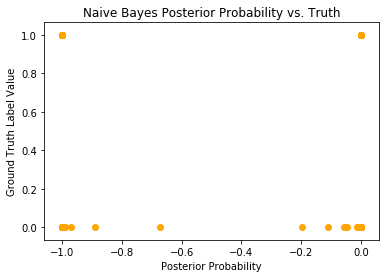

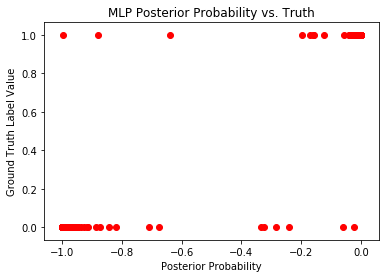

In [8]:
# plot the posterior probabilities vs. the truth label value
plt.figure()
plt.scatter(logprob[:,1], y_test, color='blue')
plt.xlabel('Posterior Probability')
plt.ylabel('Ground Truth Label Value')
plt.title('Logistic Posterior Probability vs. Truth')

# plot for Naive Bayes
plt.figure()
plt.scatter(NBprob[:,0], y_test, color='orange')
plt.xlabel('Posterior Probability')
plt.ylabel('Ground Truth Label Value')
plt.title('Naive Bayes Posterior Probability vs. Truth')

# plot for MLP
plt.figure()
plt.scatter(MLPprob[:,0], y_test, color='red')
plt.xlabel('Posterior Probability')
plt.ylabel('Ground Truth Label Value')
plt.title('MLP Posterior Probability vs. Truth')
plt.show()

### 5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

Naive Bayes estimates more of the posterior probabilities to be close to 0 or 1, while the other models give better estimates of posterior probabilities, so this leads to the Naive Bayes model being less accurate.